<a href="https://colab.research.google.com/github/Sunkohli/Lab-1-Quantum-Algorithm/blob/main/QRNG_Algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
#install Qiskit runtime
!pip install qiskit qiskit_aer qiskit-ibm-runtime matplotlib pylatexenc

In [9]:
#install latest version of Aer
%pip install "qiskit-aer>=0.17.0"

In [10]:
#find out Qiskit Version
from qiskit import __version__
print(__version__)

2.1.0


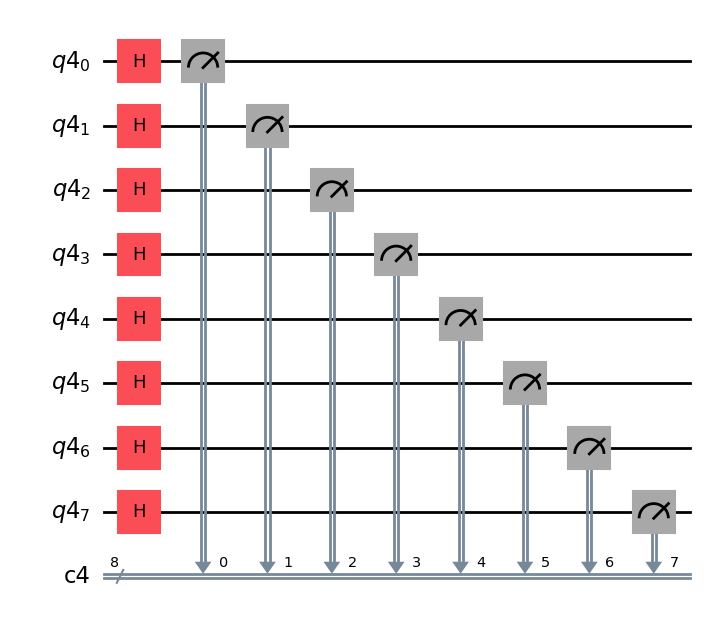

In [13]:
#Use Statevector simulator with transpile
import qiskit
from qiskit import QuantumRegister, QuantumCircuit
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler
from qiskit import transpile
from qiskit_aer import Aer, AerSimulator
import numpy as np
from qiskit.visualization import plot_histogram
# Create a quantum circuit with n qubits and then use n number of H gates to create
#superposition for each qubit. When these qubits are measured their state would
# collapse to |0> or |1> with an equal probability of getting either outcome

def setup_qrng_ckt(m: int):

    global circuit

    quantumbits = QuantumRegister(m) # Create a quantum register of size m

    classicbits = qiskit.ClassicalRegister(m)

    circuit = QuantumCircuit(quantumbits, classicbits)

    circuit.h(quantumbits) # Apply Hadamard gate to qubits
    circuit.measure(quantumbits, classicbits) #measure all qubits
setup_qrng_ckt(8) # apply the set_qubit function for 8 qubits
circuit.draw('mpl')


In [14]:
backend = AerSimulator(method='statevector')

# First we have to transpile the quantum circuit
# to the low-level instructions used by the
# backend
qc_compiled = transpile(circuit, backend)

# Execute the circuit on the statevector simulator.
# We've set the number of repeats of the circuit 32 times each time we would get
# a random result for each qubit
job_sim = backend.run(circuit, shots=32)

# Grab the results from the job.
result_sim = job_sim.result()
counts = result_sim.get_counts(circuit)
print(counts) # different random output get printed for each circuit run

{'00011001': 1, '00101011': 1, '00111010': 1, '00011110': 1, '00000111': 1, '11000001': 1, '11011010': 1, '00110011': 1, '00010001': 1, '01111011': 1, '01101010': 1, '01010001': 1, '11110001': 1, '10000100': 1, '01110010': 2, '11001100': 1, '01110011': 1, '11000000': 1, '10010111': 1, '01001010': 1, '00111001': 1, '01100111': 1, '01110000': 1, '01101000': 1, '01101110': 1, '01100000': 1, '00001101': 1, '11111011': 1, '11110100': 1, '01100001': 1, '10010110': 1}
